In [80]:
from matplotlib import style
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import scipy.stats
style.use('ggplot')

In [123]:
def setText(plot, title, xlab, ylab):
  plot.title(title);plot.xlabel(xlab);plot.ylabel(ylab)

def setTextSub(plot, title, xlab, ylab):
  plot.set_title(title);plot.set_xlabel(xlab);plot.set_ylabel(ylab)

In [75]:
# copied from the manuel and use mutli-curser to edit
labels = [["C3_C","MEOH_2","DPPH_1","DPPH_3","C3_B",
          "C5_B","C3_C","C4_B","C3_A","T2","C2_A","C1_BK"],
          ["DPPH_2","C1_B","MEOH_3","C2_A"  ,"C4_BK","T1",
             "C3_BK","C4_BK","C1_A","C2_BK","C6_C","C4_A"],
          ["C6_BK","C6_A","C5_C","C2_BK","C3_BK","T4",
             "T4","C2_C","C5_A","C3_B","C1_C","C1_B"],
          ["C3_A","C6_B","C1_BK","C4_A","T2","C2_C",
             "C6_A","T5","T1","MEOH_2","DPPH_2","T3"],
          ["MEOH_1","T6","C2_B","C4_B","C4_C","C5_BK",
             "C4_C","C5_C","DPPH_1","DPPH_3","MEOH_3","C6_B"],
          ["T3","C1_A","C5_A","C1_C","T5","C6_C","C5_B",
             "C2_B","C6_BK","T6","C5_BK","MEOH_1"]
          ] # removed space
# Since we are group 1
labels = [i[:6] for i in labels]
labels = np.array(labels).flatten()

# [i.split("") for i in labels]

In [95]:
# Trolox Std  T1-T6
dataPoints = ["T"+ str(i) for i in range(1,7)]
D10 = np.array(pd.read_csv("10.csv")[[str(i) for i in range(1,7)]]).flatten()
D15 = np.array(pd.read_csv("15.csv")[[str(i) for i in range(1,7)]]).flatten()
D20 = np.array(pd.read_csv("20.csv")[[str(i) for i in range(1,7)]]).flatten()
concentrations =  [50, 12.5, 3.1, 0.78, 0.20, 0.05]

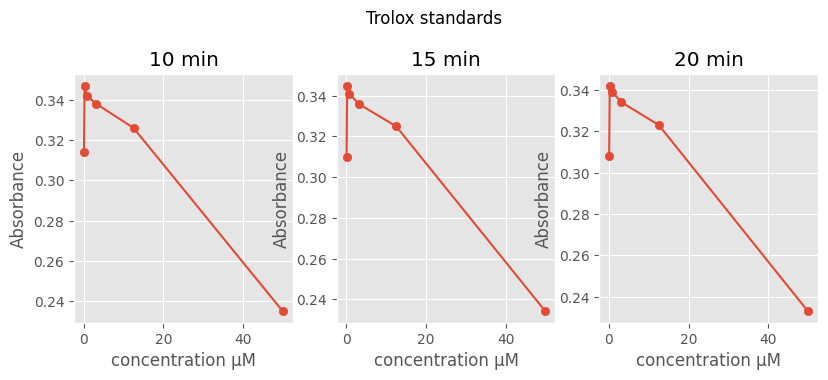

In [138]:
fig, axs = plot.subplots(1, 3, figsize=(8*1.2,3*1.2))
plot.suptitle("Trolox standards\n");fig.subplots_adjust(top=0.8)
for id, frame in enumerate([D10, D15, D20]):
    data = [frame[np.where(labels==i)] for i in dataPoints]
    axs[id].plot(concentrations, data)
    setTextSub(axs[id],f"{[10,15,20][id]} th","concentration µM","Absorbance")#kunnotmin
    axs[id].scatter(concentrations, data)

There is a outlier

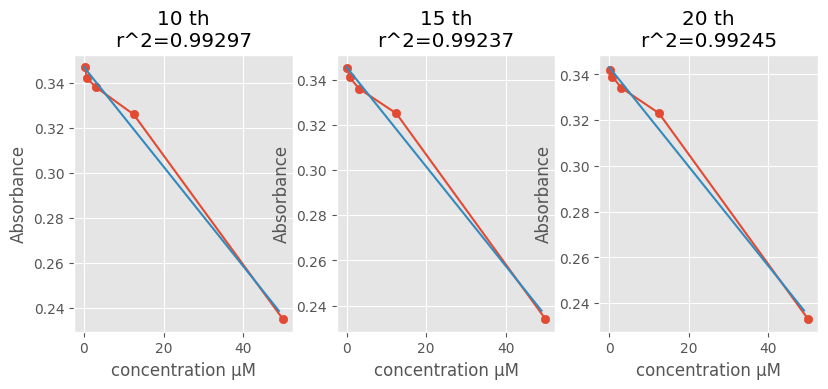

In [145]:
fig, axs = plot.subplots(1, 3, figsize=(8*1.2,3*1.2))
for id, frame in enumerate([D10, D15, D20]):
    data = [frame[np.where(labels==i)] for i in dataPoints]
    axs[id].plot(concentrations[:-1], data[:-1])
    axs[id].scatter(concentrations[:-1], data[:-1])
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(concentrations[:-1], np.array(data[:-1]).flatten())
    axs[id].plot(np.arange(0,50),np.arange(0,50)*slope+intercept)
    setTextSub(axs[id],f"{[10,15,20][id]} th\nr^2={r_value**2:.{5}f}","concentration µM","Absorbance")
    # print(f"x*{slope}+{intercept}\nr^2={r_value**2}  p-value={p_value}")

array([[50.  ],
       [12.5 ],
       [ 3.1 ],
       [ 0.78],
       [ 0.2 ]])